In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Project Movie Analytic')

In [ ]:
os.listdir()

In [ ]:
movies_data = pd.read_csv('movies_metadata.csv')

In [ ]:
movies_data.info()

In [ ]:
movies_data

In [ ]:
movies_data["profit"] = movies_data["revenue"].sub(movies_data["budget"])

In [ ]:
movies_data["profit"].hist(bins = 100)
plt.title("profit movies distribution")
plt.show()

In [ ]:
movies_data["profit"].describe()

In [ ]:
movies_data["profit"].plot(kind = "box")
plt.show()

In [ ]:
sns.boxplot(movies_data, x = "profit")
plt.show()

In [ ]:
sns.boxplot(movies_data, x = "runtime")
plt.show()

In [ ]:
movies_data["profit"].quantile(0.9)

In [ ]:
sns.scatterplot(movies_data, x = "runtime", y = "profit")
plt.show()

In [ ]:
profitable_movies = movies_data[movies_data["profit"] > 0]

In [ ]:
profitable_movies

In [ ]:
sns.scatterplot(profitable_movies, x = "runtime", y = "profit")
plt.show()

In [ ]:
movies_data["release_date"] = pd.to_datetime (movies_data["release_date"])

In [ ]:
movies_data["status"].unique()

In [ ]:
movies_data["original_language"].nunique()

In [ ]:
english_release = movies_data[(movies_data["status"] == "Released") & (movies_data["original_language"] == "en")]

In [ ]:
english_release

In [ ]:
english_release.sort_values(["budget", "revenue"], ascending = [False, False]).head(10)

In [ ]:
english_release.drop_duplicates(inplace = True)

In [ ]:
english_release.isna().sum()

In [ ]:
english_release["tagline"] = english_release["tagline"].fillna("No Tagline")
english_release["belongs_to_collection"] = english_release["belongs_to_collection"].fillna("No Data")
english_release["homepage"] = english_release["homepage"].fillna("No Data")
english_release["poster_path"] = english_release["poster_path"].fillna("No Data")

In [ ]:
english_release.dropna(inplace = True)

In [ ]:
english_release.shape

In [ ]:
english_release [english_release["runtime"] > 60 * 3]

In [ ]:
rating = pd.read_csv("ratings_small.csv")

In [ ]:
rating.head()

In [ ]:
pd.to_datetime(rating["timestamp"], unit = "s")

In [ ]:
rating["timestamp"] = pd.to_datetime(rating["timestamp"], unit = "s")

In [ ]:
rating.info()

In [ ]:
rating.duplicated().sum()

In [ ]:
rating.groupby("movieId")["rating"].agg(["mean", "count", "median"])

In [ ]:
movies_rating = rating.groupby("movieId")["rating"].agg(["mean", "median", "count"])

In [ ]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()

In [ ]:
sns.histplot(data = rating_movies, x = "rating")
plt.show()

In [ ]:
rating_movies["good_movies"] = (rating_movies["rating"] >= 3)

In [ ]:
rating_movies["good_movies"].value_counts().plot(kind = "pie")

In [ ]:
movies_rating

In [71]:
new_df = movies_data.merge(rating_movies, left_on = "id", right_on = "movieId", how = "inner")

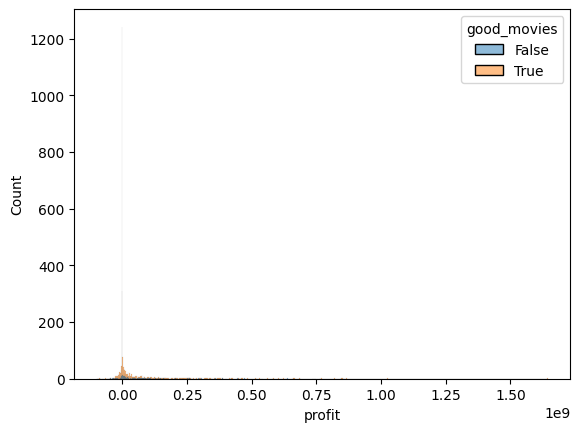

In [72]:
sns.histplot(data = new_df, x = "profit", hue = "good_movies")
plt.show()

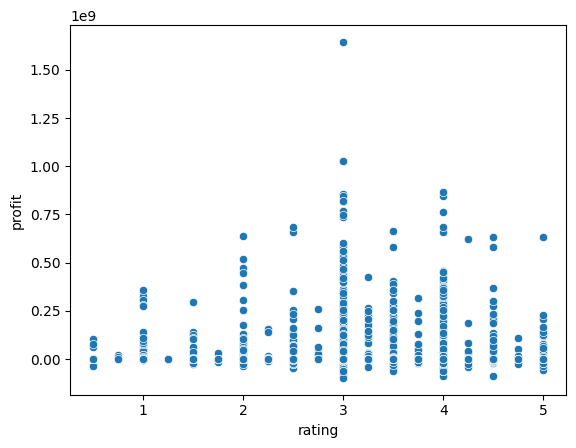

In [75]:
sns.scatterplot(data = new_df, x = "rating", y = "profit")
plt.show()

In [76]:
new_df[["rating"]]

,rating
0,3.75
1,1.50
2,4.00
3,3.50
4,5.00
...,...
2826,3.25
2827,4.00
2828,4.00
2829,4.00


<Axes: xlabel='original_language'>

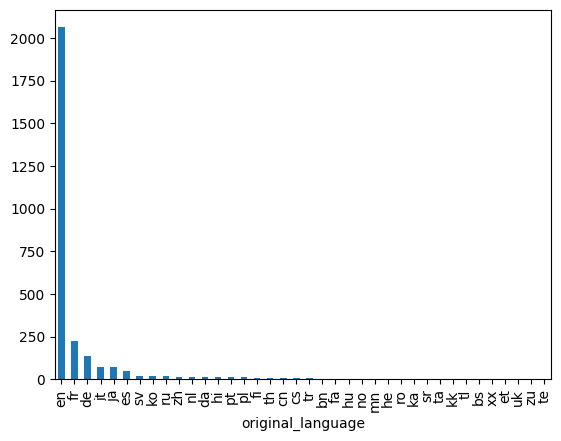

In [78]:
new_df["original_language"].value_counts().plot(kind = "bar")

In [79]:
new_df.select_dtypes(include = "number")

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,movieId,rating
0,60000000,949,17.924927,187436818.0,170.0,7.7,1886.0,127436818.0,949,3.75
1,58000000,710,14.686036,352194034.0,130.0,6.6,1194.0,294194034.0,710,1.50
2,98000000,1408,7.284477,10017322.0,119.0,5.7,137.0,-87982678.0,1408,4.00
3,52000000,524,10.137389,116112375.0,178.0,7.8,1343.0,64112375.0,524,3.50
4,16500000,4584,10.673167,135000000.0,136.0,7.2,364.0,118500000.0,4584,5.00
...,...,...,...,...,...,...,...,...,...,...
2826,0,80831,0.083371,0.0,121.0,6.5,2.0,0.0,80831,3.25
2827,0,3104,2.302582,0.0,92.0,5.9,33.0,0.0,3104,4.00
2828,0,64197,0.528657,0.0,97.0,6.0,5.0,0.0,64197,4.00
2829,0,98604,0.803588,0.0,91.0,4.6,6.0,0.0,98604,4.00


In [80]:
def select_columns(df: pd.DataFrame, features : list, target : list = "rating"):
  df = df.dropna().reset_index(drop = True)
  X = df[features]
  y = (df[target] >= 3).astype("int")

  return X, y

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
features = ["budget", "popularity", "vote_average"]
X, y = select_columns(new_df, features = features)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
minmax = MinMaxScaler()

In [87]:
minmax.fit(X_train)

MinMaxScaler()

In [88]:
def scaling(df, scaler):

  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns = scaler.get_feature_names_out())

  return scaled_df

In [89]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

In [90]:
X_test_scaled.iloc[0]

,0
budget,0.500000
popularity,0.042270
vote_average,0.568182


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

In [93]:
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [94]:
y_train_pred_knn = knn.predict(X_train_scaled)
y_train_pred_dt = dt.predict(X_train_scaled)

In [95]:
y_test_pred_knn = knn.predict(X_test_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

In [96]:
pd.crosstab(y_test, y_test_pred_knn)

col_0,0,1
rating,,
0,0,6
1,1,35


In [97]:
pd.crosstab(y_test, y_test_pred_dt)

col_0,0,1
rating,,
0,0,6
1,5,31


In [ ]:
english_release_rating = english_release.merge(movies_rating, left_on = "id", right_on = "movieId", how = "inner")

In [ ]:
english_release_rating

In [ ]:
english_release_rating["profit"] =  english_release_rating["revenue"].sub(english_release_rating["budget"])

In [ ]:
english_release_rating[["original_title", "profit", "runtime"]].sort_values("profit", ascending = False)

In [ ]:
english_release_rating["long_duration_movie"] = (english_release_rating["runtime"] >= 60 * 3).astype(int)

In [ ]:
english_release_rating[english_release_rating["long_duration_movie"] == 1]

In [ ]:
english_release_rating["title_length"] = english_release_rating["original_title"].str.len()

In [ ]:
english_release_rating[english_release_rating["title_length"] < 5]

In [ ]:
english_release_rating["duration_hours"] = english_release_rating["runtime"] / 60

In [ ]:
english_release_rating["year_release"] = english_release_rating["release_date"].dt.year

In [ ]:
english_release_rating["favorite_movie"] = english_release_rating["median"] >= 3

In [ ]:
year_release = english_release_rating.groupby("year_release").size()

In [ ]:
year_release.sort_values(ascending = False)